In [10]:
import requests
import pandas as pd
import os
import json

eia_api_key = os.environ['EIA_API_KEY']

In [42]:
usw_df = pd.read_csv('data/uswtdbCSV/uswtdb_v3_0_1_20200514.csv')
usw_df.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3073326,NaN,NaN,4970.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.358871,35.084488
1,3073427,NaN,NaN,4954.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.362762,35.086163
2,3003862,NaN,NaN,5836.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.351288,35.091396
3,3072662,NaN,NaN,5113.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.368385,35.075634
4,3073445,NaN,NaN,4958.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.360405,35.084354


In [45]:
print(np.count_nonzero([len(usw_df[usw_df.eia_id == eia_id])>0 for eia_id in plant_df['Plant Code']]))
print(len(usw_df['p_name'].unique()))

1016
1582


In [46]:
plant_df = pd.read_csv('data/List_of_plants_for_wind_United_States_all_sectors.csv',skiprows=4)
print(len(plant_df))
plant_df.head()

1168


,Plant Name,Plant Code,State,Sector Name,Prime Movers,Fuel Types
0,85 A,52162,CA,Electric utility non-cogen,WT,WND
1,85 B,52163,CA,Electric utility non-cogen,WT,WND
2,Adair Wind Farm,56810,IA,Electric utility,WT,WND
3,Adams Wind,59637,IA,Electric utility,WT,WND
4,Adams Wind Farm,56307,MN,Electric utility non-cogen,WT,WND


In [52]:
response = requests.get(
    'http://api.eia.gov/series/?api_key='+ eia_api_key + '&series_id=ELEC.PLANT.GEN.52162-ALL-ALL.A'
)
data = json.loads(response.content.decode('utf-8'))

In [73]:
def parse_data(data):
    ddict = data['series'][0]
    out_dict = {int(x[0]): x[1] for x in ddict['data']}
    out_dict.update({'lat' : float(ddict['lat']), 'lon' : float(ddict['lon'])})
    return out_dict
def get_plant_data(eia_id,eia_api_key):
    response = requests.get(
    'http://api.eia.gov/series/?api_key='+ eia_api_key + '&series_id=ELEC.PLANT.GEN.'+ str(eia_id) + '-ALL-ALL.A'
    )
    return json.loads(response.content.decode('utf-8'))
def dict_listify(d): #make each element a single element list, for pandas
    return {k:[v] for k,v in d.items()}
def dict_to_panda_row(d): #dict to single row pd df
    return pd.DataFrame(dict_listify(d))

In [76]:
response = requests.get(
    'http://api.eia.gov/series/?api_key='+ eia_api_key + '&series_id=ELEC.PLANT.GEN.ALL-ALL-ALL.A'
    )

In [78]:
test = json.loads(response.content.decode('utf-8'))

In [96]:
data_dicts = []
for i,eia_id in enumerate(plant_df['Plant Code'][500:]):
    if i%10 == 0:
        print(i)
    try:
        data_dicts.append(parse_data(get_plant_data(eia_id,eia_api_key)))
    except Exception as e:
        print(e)
        data_dicts.append([])

0
'series'
10
20
30
40
50
60
70
'series'
'series'
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
'series'
300
310
320
330
340
'series'
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
'series'
590
'series'
'series'
'series'
'series'
'series'
'series'
600
610
620
630
640
650
660


In [89]:
test = get_plant_data(plant_df['Plant Code'].iloc[215],eia_api_key)

In [90]:
test

{'request': {'command': 'series',
  'series_id': 'elec.plant.gen.63431-all-all.a'},
 'data': {'error': 'invalid series_id. For key registration, documentation, and examples see https://www.eia.gov/developer/'}}

In [84]:
#data_dicts_215 = data_dicts.copy()

In [97]:
# import pickle as pkl
# with ropen('eia_dicts_500:.pkl','wb') as f:
#     pkl.dump(data_dicts,f,protocol=3)

In [99]:
import pickle as pkl
all_dicts = []
for file_end in ['215','215:500','500:']:
    with open('eia_dicts_' + file_end + '.pkl','rb') as f:
        all_dicts = all_dicts + pkl.load(f)

In [109]:
dict_to_panda_row(all_dicts[0])

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,lat,lon
0,15766,16521,16012,13347,16839,18640,14816,19384,20673,19576,20895,16263.002,8781,13725,18309,19298,22893,19458,35.1011,-118.3372


In [110]:
pd.DataFrame({})

""


In [271]:
power_df = pd.concat([dict_to_panda_row(d) if len(d) > 0 else pd.DataFrame({'lat' : [np.nan]})  for d in all_dicts])
power_df = power_df.reset_index().drop('index',axis=1)

In [120]:
#test
print(parse_data(get_plant_data(plant_df['Plant Code'].iloc[800],eia_api_key)))
print(power_df.iloc[800])

{2018: 589700, 2017: 625474, 2016: 573434, 2015: 234347, 'lat': 40.999169, 'lon': -88.056247}
2018    589700.000000
2017    625474.000000
2016    573434.000000
2015    234347.000000
2014              NaN
2013              NaN
2012              NaN
2011              NaN
2010              NaN
2009              NaN
2008              NaN
2007              NaN
2006              NaN
2005              NaN
2004              NaN
2003              NaN
2002              NaN
2001              NaN
lat         40.999169
lon        -88.056247
2019              NaN
Name: 0, dtype: float64


In [193]:
power_df.loc[0].loc[np.arange(2001,2020)]

2001    19458
2002    22893
2003    19298
2004    18309
2005    13725
2006     8781
2007    16263
2008    20895
2009    19576
2010    20673
2011    19384
2012    14816
2013    18640
2014    16839
2015    13347
2016    16012
2017    16521
2018    15766
2019      NaN
Name: 0, dtype: object

In [272]:
power_df['Plant Code'] = plant_df['Plant Code']
power_df['Plant Name'] = plant_df['Plant Name']
power_df['State'] = plant_df['State']
power_df['mean MWh'] = power_df.apply(lambda row: np.mean(row.loc[np.arange(2001,2020)]),axis=1)
power_df['mean MW'] = power_df['mean MWh']/8760

In [273]:
power_df.head()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,2002,2001,lat,lon,2019,Plant Code,Plant Name,State,mean MWh,mean MW
0,15766.0,16521.0,16012.0,13347.0,16839.0,18640.0,14816.0,19384.0,20673.0,19576.0,...,22893.0,19458.0,35.101100,-118.337200,NaN,52162,85 A,CA,17288.666778,1.973592
1,18824.0,16355.0,20601.0,17296.0,22336.0,25968.0,19584.0,25984.0,29408.0,27564.0,...,32732.0,27425.0,35.101100,-118.337200,NaN,52163,85 B,CA,24298.944333,2.773852
2,414150.0,471946.0,485613.0,470368.0,490310.0,523247.0,538881.0,531126.0,497375.0,438053.0,...,NaN,NaN,41.423600,-94.665000,NaN,56810,Adair Wind Farm,IA,443616.636364,50.641169
3,459960.0,485774.0,483943.0,34999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40.920000,-94.671667,NaN,59637,Adams Wind,IA,366169.000000,41.800114
4,47270.0,55159.0,57259.0,59207.0,60767.0,59686.0,61706.0,59639.0,56083.0,60575.0,...,NaN,NaN,43.554778,-92.724139,NaN,56307,Adams Wind Farm,MN,58914.333267,6.725381


In [274]:
usw_df_filter = pd.concat([usw_df[usw_df['eia_id'] == eia_id] for eia_id in power_df['Plant Code']])
usw_df_filter['eia_id'] = usw_df_filter['eia_id'].astype(np.int)

In [212]:
len(usw_df_filter['eia_id'].unique())

1016

In [225]:
power_df[power_df['Plant Code'] == usw_df_stats['eia_id'].iloc[0]][2018]

944    32235.0
Name: 2018, dtype: float64

In [238]:
power_df.set_index('Plant Code').loc[90,'mean MWh']

30991.777722222225

In [276]:
usw_df_stats = usw_df_filter.groupby('eia_id').agg({'t_cap' : lambda x : x.sum()/1000, 'p_cap' : ['max','min']}).reset_index()
#usw_df_stats['cap_factor'] = usw_df_stats.apply(lambda row: power_dfrow['eia_id'],axis=1)
usw_df_stats['mean MW'] = [power_df.set_index('Plant Code').loc[eia_id,'mean MW'] for eia_id in usw_df_stats['eia_id']]
usw_df_stats['latitude'] = [power_df.set_index('Plant Code').loc[eia_id,'lat'] for eia_id in usw_df_stats['eia_id']]
usw_df_stats['longitude'] = [power_df.set_index('Plant Code').loc[eia_id,'lon'] for eia_id in usw_df_stats['eia_id']]
usw_df_stats['State'] = [power_df.set_index('Plant Code').loc[eia_id,'State'] for eia_id in usw_df_stats['eia_id']]
usw_df_stats['t_cap_factor'] = usw_df_stats['mean MW']/usw_df_stats[('t_cap','<lambda>')]
usw_df_stats['p_cap_factor'] = usw_df_stats['mean MW']/usw_df_stats[('p_cap','max')]

#filter out some nans
usw_df_stats = usw_df_stats.iloc[usw_df_stats[['latitude','longitude','t_cap_factor','p_cap_factor','eia_id','mean MW']].dropna().index]

#filter out AK, HI
usw_df_stats = usw_df_stats[(usw_df_stats['State'] != 'HI') & (usw_df_stats['State'] != 'AK')]
usw_df_stats

eia_id    t_cap   p_cap            mean MW   latitude   longitude State  \
            <lambda>     max     min                                           
1       508    7.500    4.50    3.00   3.719400  38.033327 -102.537915    CO   
2       692    6.270    3.30    1.20   1.956919  41.835278 -106.242778    WY   
3       944    3.000    3.00    3.00   0.453438  41.451494  -90.148547    IL   
4      1172    1.500    1.50    1.50   0.314396  43.279722  -92.810556    IA   
5      1998    1.200    1.25    1.25   0.262241  43.940500  -94.943400    MN   
...     ...      ...     ...     ...        ...        ...         ...   ...   
1009  62227   30.240   30.24   30.24   9.313927  33.578240  -99.192100    TX   
1010  62269  100.750   66.63   34.13  36.363242  44.104377  -96.126733    MN   
1011  62291   44.600   44.60   44.60   8.145776  44.857694  -95.568888    MN   
1012  62356  181.300  183.75  183.75  42.542580  34.072251  -99.264676    TX   
1013  62488  199.275  199.28  199.28  36.402968  37.978800  -95.224400    KS   

     t_cap_factor p_cap_factor  
                                
1        0.495920     0.826533  
2        0.312108     0.593006  
3        0.151146     0.151146  
4        0.209597     0.209597  
5        0.218535     0.209793  
...           ...          ...  
1009     0.308000     0.308000  
1010     0.360925     0.545749  
1011     0.182641     0.182641  
1012     0.234653     0.231524  
1013     0.182677     0.182672  

[993 rows x 10 columns]

In [277]:
#usw_df_stats.to_pickle('data/all-power-1.pkl')

In [251]:
np.min(usw_df_stats['p_cap'])

max    0.66
min    0.07
dtype: float64

8


12

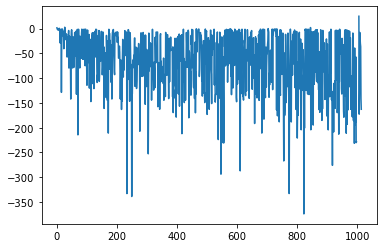

In [262]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(usw_df_stats['mean MW']-usw_df_stats[('p_cap','max')])
print(np.count_nonzero(usw_df_stats['mean MW']>usw_df_stats[('p_cap','max')]))
np.count_nonzero(usw_df_stats['mean MW']>usw_df_stats[('t_cap','<lambda>')])

In [173]:
np.max(usw_df_stats[('p_cap','std')]/usw_df_stats[('p_cap','mean')])

1.3855646688443584

In [169]:
usw_df_stats[('p_cap','mean')]

eia_id
90         1.005882
508        4.200000
692        2.393333
944        3.000000
1172       1.500000
            ...    
62291     44.600000
62356    183.750000
62488    199.280000
62642           NaN
62736      0.975000
Name: (p_cap, mean), Length: 1016, dtype: float64